In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['pcolor.shading'] = 'auto'
import numpy as np 
import xarray as xr

In [2]:
tl = xr.open_dataset('Results/arctic/TL_intensity_ref_source.nc')

In [3]:
tl

<xarray.Dataset>
Dimensions:   (Range: 65536, Altitude: 240)
Coordinates:
  * Range     (Range) float32 0.001461 0.002922 0.004382 ... 95.73 95.73 95.73
  * Altitude  (Altitude) float64 -1.2 -1.195 -1.19 ... -0.015 -0.01 -0.005
Data variables:
    TL        (Altitude, Range) float32 ...
Attributes:
    description:  Trnsmission loss
    units:        dB

In [4]:
# rainy_sif_xds.interp(lat=rainy_imerg_xds["lat"]
r = tl['Range'].values
l = len(r)
new_r = np.arange(0, r[-1], r[-1]/(l//5))


In [5]:
tl = tl.interp(Range=new_r, method='nearest')

/Users/gilaverbuch/opt/miniconda3/envs/pysabeam/lib/python3.10/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/Users/gilaverbuch/opt/miniconda3/envs/pysabeam/lib/python3.10/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")


In [6]:
r = tl['Range'].values
alt = tl['Altitude'].values
TL = tl['TL'].values
TL = np.flip(TL, axis=0)
tl.close()

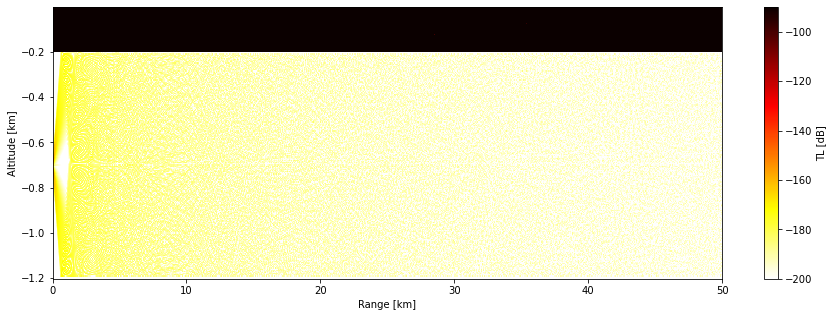

In [7]:
# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('hot')
  
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()


plt.figure(figsize=(15,5))
plt.pcolormesh(r, alt, TL,  cmap=reversed_map)
# plt.ylim([0,20])
plt.xlim([0,50])
plt.xlabel('Range [km]')
plt.ylabel('Altitude [km]')
plt.colorbar(label='TL [dB]')
plt.clim([-200,-90])
plt.show()

In [8]:
modes = data_off = np.loadtxt('Results/arctic/modes_alt_-1105.csv')

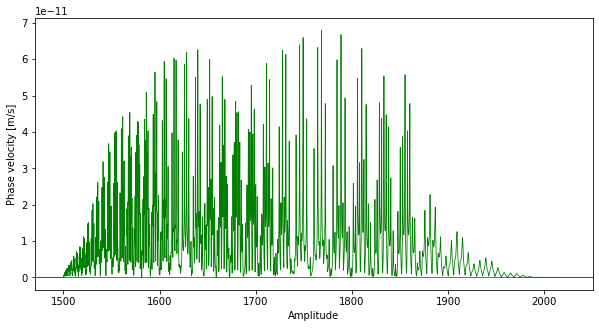

In [9]:
plt.figure(figsize=(10,5))
plt.plot(modes[:,0], modes[:,1], 'g',linewidth=0.8)
plt.xlim(1470,2050)
plt.ylabel("Phase velocity [m/s]")
plt.xlabel("Amplitude")
plt.show()